### This JS code from stackoverflow allegedly hides python warnings using css selectors

In [1]:
%%javascript
(function(on) {
const e=$( "<a>Setup failed</a>" );
const ns="js_jupyter_suppress_warnings";
var cssrules=$("#"+ns);
if(!cssrules.length) cssrules = $("<style id='"+ns+"' type='text/css'>div.output_stderr { } </style>").appendTo("head");
e.click(function() {
    var s='Showing';  
    cssrules.empty()
    if(on) {
        s='Hiding';
        cssrules.append("div.output_stderr, div[data-mime-type*='.stderr'] { display:none; }");
    }
    e.text(s+' warnings (click to toggle)');
    on=!on;
}).click();
$(element).append(e);
})(true);

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from scipy.spatial.distance import hamming

In [3]:
users = pd.read_csv('./users.csv', delimiter=';')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


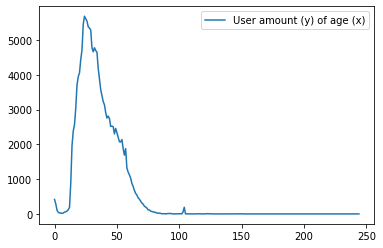

In [4]:
userAges = pd.Series(users.Age.dropna().astype(int).value_counts()).sort_index(ascending=True)
plt.plot(userAges)
plt.legend(['User amount (y) of age (x)'])
plt.show()

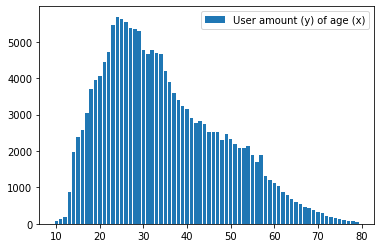

In [5]:
userAges = pd.Series(users.Age.dropna().astype(int).value_counts()).sort_index(ascending=True)[10:80]
plt.bar(userAges.index, userAges.values)
plt.legend(['User amount (y) of age (x)'])
plt.show()

In [6]:
# Sommige boeken hebben meerdere URLs gescheiden met ; in de laatste kolom staan, dit zorgt voor errors in pandas
# De parameter error_bad_lines laat de 8 dataregels vallen waar dit voorkomt
# Door het overslaan van sommige rijen klopt de index niet meer volledig, die wordt gereset om dat te herstellen
books = pd.read_csv('./books.csv', delimiter=';', error_bad_lines=False).reset_index(drop=True)
books.info()

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
# Er zijn boeken waar year of publication een string bevatten, die moeten er eerst uit worden gefilterd
pubYears = books[pd.to_numeric(books['Year-Of-Publication'], errors='coerce').notnull()]['Year-Of-Publication'].astype(int)

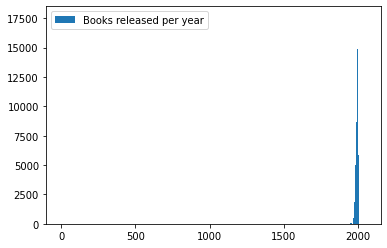

In [8]:
publicationYears = pd.Series(pubYears.dropna().value_counts()).sort_index(ascending=True)
plt.bar(publicationYears.index, publicationYears.values)
plt.legend(['Books released per year'])
plt.show()

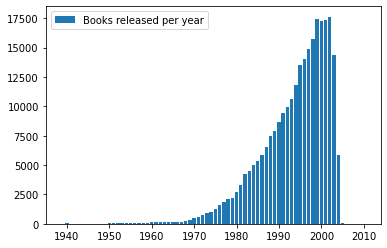

In [9]:
publicationYears = pd.Series(pubYears.dropna().value_counts()).sort_index(ascending=True)[-80:-10]
plt.bar(publicationYears.index, publicationYears.values)
plt.legend(['Books released per year'])
plt.show()

In [10]:
publicationYears

1939       9
1940      36
1941      10
1942      14
1943       8
        ... 
2004    5839
2005      46
2006       3
2008       1
2010       2
Name: Year-Of-Publication, Length: 70, dtype: int64

In [11]:
ratings = pd.read_csv('./ratings.csv', delimiter=';')
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


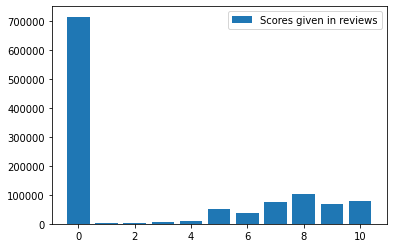

In [12]:
ratingScores = pd.Series(ratings['Book-Rating'].dropna().astype(int).value_counts()).sort_index(ascending=True)
plt.bar(ratingScores.index, ratingScores.values)
plt.legend(['Scores given in reviews'])
plt.show()

### Kolomnames wijzigen om duidelijk te maken welke data uit welk dataframe komt, helpt verwarring te vermijden bij het mergen van de drie datasets

In [13]:
new_user_colnames = {
    "User-ID": "User-ID",
    "Location": "User-Location",
    "Age": "User-Age"
}
users = users.rename(columns = new_user_colnames)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   User-ID        278858 non-null  int64  
 1   User-Location  278858 non-null  object 
 2   User-Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [14]:
new_book_colnames = {
    "ISBN": "ISBN",
    "Book-Title": "Book-Title",
    "Book-Author": "Book-Author",
    "Year-Of-Publication": "Book-Year-Of-Publication",
    "Publisher": "Book-Publisher"
}
# De kolommen met URLs in zijn nooit interessant voor een recommender dus die laat ik wegvallen
books = books.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L']).rename(columns = new_book_colnames)
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   ISBN                      271360 non-null  object
 1   Book-Title                271360 non-null  object
 2   Book-Author               271359 non-null  object
 3   Book-Year-Of-Publication  271360 non-null  object
 4   Book-Publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [15]:
# create merged_dataset of all data
merged_data = pd.merge(pd.merge(books, ratings, how='outer'), users, how='outer')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1324564 entries, 0 to 1324563
Data columns (total 9 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   ISBN                      1150989 non-null  object 
 1   Book-Title                1032345 non-null  object 
 2   Book-Author               1032344 non-null  object 
 3   Book-Year-Of-Publication  1032345 non-null  object 
 4   Book-Publisher            1032343 non-null  object 
 5   User-ID                   1323355 non-null  float64
 6   Book-Rating               1149780 non-null  float64
 7   User-Location             1323355 non-null  object 
 8   User-Age                  946277 non-null   float64
dtypes: float64(3), object(6)
memory usage: 101.1+ MB


### Save merged dataset in 10 parts to fake 10 1-day batches of data for mapreduce project

In [16]:
for i in range(10):
    rows = merged_data.shape[0]
    start = int((rows/10)*i)
    end = int(start + (rows/10))
    if end > rows:
        merged_data[start:].to_csv(f'./mapred_dataset_{i}.csv', sep=';', header=False, index=False)
    else:
        merged_data[start:end].to_csv(f'./mapred_dataset_{i}.csv', sep=';', header=False, index=False)

### Remove books with less than 10 reviews to reduce processing time/cost for recommender

In [17]:
merged_data['ISBN'].value_counts()

0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
              ... 
0441833446       1
8473931602       1
037382243X       1
3436012483       1
0465039138       1
Name: ISBN, Length: 341765, dtype: int64

In [18]:
most_ratings_per_book = merged_data['ISBN'].value_counts()
to_remove = most_ratings_per_book[most_ratings_per_book < 10].index
most_ratings_per_book.drop(to_remove, inplace=True)
most_ratings_per_book

0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
              ... 
0671019015      10
9728436408      10
2070360377      10
0451526236      10
0345353129      10
Name: ISBN, Length: 18319, dtype: int64

In [19]:
merged_data = merged_data[merged_data.apply(lambda book: book['ISBN'] in most_ratings_per_book, axis=1)]
merged_data

,ISBN,Book-Title,Book-Author,Book-Year-Of-Publication,Book-Publisher,User-ID,Book-Rating,User-Location,User-Age
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada",NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,8.0,0.0,"timmins, ontario, canada",NaN
5,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,8.0,0.0,"timmins, ontario, canada",NaN
19,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400.0,0.0,"ottawa, ontario, canada",49.0
20,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,11400.0,9.0,"ottawa, ontario, canada",49.0
...,...,...,...,...,...,...,...,...,...
1148009,342619581X,NaN,NaN,NaN,NaN,216615.0,0.0,"dortmund, nordrhein-westfalen, germany",22.0
1148010,3546003470,NaN,NaN,NaN,NaN,197820.0,0.0,"cologne, nordrhein-westfalen, germany",20.0
1148011,3791504657,NaN,NaN,NaN,NaN,167185.0,0.0,"m�nchengladbach, ,",18.0
1148012,3791504657,NaN,NaN,NaN,NaN,195860.0,9.0,"j�chen, nordrhein-westfalen, germany",30.0


In [20]:
merged_data['ISBN'].value_counts()

0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
              ... 
0425071804      10
0373030541      10
0140445269      10
0812518055      10
0553577905      10
Name: ISBN, Length: 18319, dtype: int64

### Remove users with less than 10 reviews to reduce processing time/cost for recommender

In [21]:
merged_data['User-ID'].value_counts()

11676.0     5399
35859.0     2445
153662.0    2098
76352.0     1934
198711.0    1607
            ... 
222414.0       1
17000.0        1
278449.0       1
266400.0       1
99482.0        1
Name: User-ID, Length: 67872, dtype: int64

In [22]:
most_ratings_per_user = merged_data['User-ID'].value_counts()
to_remove = most_ratings_per_user[most_ratings_per_user < 10].index
most_ratings_per_user.drop(to_remove, inplace=True)
most_ratings_per_user

11676.0     5399
35859.0     2445
153662.0    2098
76352.0     1934
198711.0    1607
            ... 
125558.0      10
148929.0      10
9226.0        10
150657.0      10
273167.0      10
Name: User-ID, Length: 7441, dtype: int64

In [23]:
merged_data = merged_data[merged_data.apply(lambda rating: rating['User-ID'] in most_ratings_per_user, axis=1)]
merged_data

,ISBN,Book-Title,Book-Author,Book-Year-Of-Publication,Book-Publisher,User-ID,Book-Rating,User-Location,User-Age
19,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400.0,0.0,"ottawa, ontario, canada",49.0
20,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion,11400.0,9.0,"ottawa, ontario, canada",49.0
21,0151008116,Life of Pi,Yann Martel,2002,Harcourt,11400.0,6.0,"ottawa, ontario, canada",49.0
22,0671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,1998,Pocket,11400.0,0.0,"ottawa, ontario, canada",49.0
23,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,11400.0,7.0,"ottawa, ontario, canada",49.0
...,...,...,...,...,...,...,...,...,...
1091854,8806144383,NaN,NaN,NaN,NaN,48326.0,10.0,"torino, piemonte, italy",NaN
1091855,8804507454,NaN,NaN,NaN,NaN,48326.0,0.0,"torino, piemonte, italy",NaN
1091857,8807817039,NaN,NaN,NaN,NaN,48326.0,10.0,"torino, piemonte, italy",NaN
1091859,8845916839,NaN,NaN,NaN,NaN,48326.0,8.0,"torino, piemonte, italy",NaN


In [24]:
merged_data['User-ID'].value_counts()

11676.0     5399
35859.0     2445
153662.0    2098
76352.0     1934
198711.0    1607
            ... 
72770.0       10
264828.0      10
67298.0       10
35144.0       10
26418.0       10
Name: User-ID, Length: 7441, dtype: int64

In [25]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414719 entries, 19 to 1091863
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ISBN                      414719 non-null  object 
 1   Book-Title                404698 non-null  object 
 2   Book-Author               404698 non-null  object 
 3   Book-Year-Of-Publication  404698 non-null  object 
 4   Book-Publisher            404698 non-null  object 
 5   User-ID                   414719 non-null  float64
 6   Book-Rating               414719 non-null  float64
 7   User-Location             414719 non-null  object 
 8   User-Age                  311958 non-null  float64
dtypes: float64(3), object(6)
memory usage: 31.6+ MB


### Specify datatypes to reduce memory impact (slightly)

In [26]:
merged_data['User-ID'] = merged_data['User-ID'].astype(np.int32)
merged_data['Book-Rating'] = merged_data['Book-Rating'].astype(np.int16)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
# year of publication should be an integer but having np.nan in a column transforms it into float datatype

merged_data['Book-Year-Of-Publication'] = merged_data['Book-Year-Of-Publication'].astype(np.float16)
#merged_data['Book-Year-Of-Publication'] = merged_data['Book-Year-Of-Publication'].replace(np.nan, -1).astype(int).replace(-1, np.nan)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
merged_data.drop(columns=['User-Location','User-Age'], inplace=True)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414719 entries, 19 to 1091863
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ISBN                      414719 non-null  object 
 1   Book-Title                404698 non-null  object 
 2   Book-Author               404698 non-null  object 
 3   Book-Year-Of-Publication  404698 non-null  float16
 4   Book-Publisher            404698 non-null  object 
 5   User-ID                   414719 non-null  int32  
 6   Book-Rating               414719 non-null  int16  
dtypes: float16(1), int16(1), int32(1), object(4)
memory usage: 19.0+ MB


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [29]:
merged_data.head()

,ISBN,Book-Title,Book-Author,Book-Year-Of-Publication,Book-Publisher,User-ID,Book-Rating
19,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,11400,0
20,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003.0,Hyperion,11400,9
21,0151008116,Life of Pi,Yann Martel,2002.0,Harcourt,11400,6
22,0671021001,She's Come Undone (Oprah's Book Club),Wally Lamb,1998.0,Pocket,11400,0
23,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,11400,7


In [30]:
merged_data.reset_index(drop=True).to_feather('data.feather')